In [1]:
import seaborn as sns
import pandas as pd

Put your name here:
* Matthew Artuso

When you encounter questions in the text below, open a markdown cell in that problem area and put your answers. 

This HW is due Sunday at midnight in D2L. 


____
# HW #2: Review and Pandas
____


✍🏻 **Problem 1**: Describe multi-indexing in Pandas, using a code example in your explanation. You should have a markdown cell and a code cell.

A multi index is a way to index using tuples of indices. In querying a multi-index, we can call the first levels (A and B) and get all the As or Bs on the first index level. We can then further index that using our 0s and 1s index level -- the 2nd level.

In [2]:
multi_df = pd.Series(['dog', 'cat', 'squirrel', 'mouse'], index=[['A', 'B', 'A', 'B'], [0, 0, 1, 1]])
display(multi_df.head())
display(multi_df.index.get_level_values(0)) ##First index level values
display(multi_df.index.get_level_values(1)) ##Second index level values

A  0         dog
B  0         cat
A  1    squirrel
B  1       mouse
dtype: object

Index(['A', 'B', 'A', 'B'], dtype='object')

Int64Index([0, 0, 1, 1], dtype='int64')

In [3]:
multi_df.loc['A'] ##Loc on first level index 

0         dog
1    squirrel
dtype: object

In [4]:
multi_df.loc['A', 0] ##Loc on both indices

'dog'

✍🏻 **Problem 2**: In the [PEP-8 standard](https://peps.python.org/pep-0008/) for Python, are these true or false?
* you should use a tab, rather than four spaces for indenting,
* there is no limit to how long a line should be,
* functions at the top of your code should be surrounded by a single line,
* imports should all be on the same line.

- False: four spaces are preferred, unless tabs have already been used in a project or piece of code to stay consistent
- False: code should be limited to 79; docstrings or comments to 72
- False: two blank lines
- False: should be separate, unless calling multiple modules from the same package

✍🏻 **Problem 3**: In a code cell, write code that performs these tasks:
* sort the list `[3, 3, 1, 89, 0, 2]` in descending order,
* add "z" to the end of the list `["w", "x", "y"]`, and then reverse the order,
* insert "b" between the "a" and "c" in the list ["a", "c"].







In [5]:
ex_list = [3, 3, 1, 89, 0, 2]
ex_list.sort(reverse=True)
print(ex_list)

[89, 3, 3, 2, 1, 0]


In [6]:
ex_list = ['w', 'x', 'y']
ex_list.append('z')
ex_list = ex_list[::-1] ##indexes everything, starting from the back
print(ex_list)

['z', 'y', 'x', 'w']


In [7]:
ex_list = ['a', 'c']
ex_list.insert(1, 'b') ##insert 'b' at index 1.
print(ex_list)

['a', 'b', 'c']


✍🏻 **Problem 4**: Last week you built your first DS web app using `streamlit`. The web app used the Italian wine dataset from `sklearn` and made the plot using a visualization library called `Altair`. Modify your code to:
* read the iris dataset from Seaborn,
* rather than using `Altair`, use `Plotly`,
* the interactive plot should be a 3D scatter plot,
* update the text to describe this dataset. 

You already know how to get datasets from Seaborn. You may not have encountered `Plotly` before, however. 

[Here](https://docs.streamlit.io/library/api-reference/charts/st.plotly_chart) is how `Plotly` works with `streamlit`. [Read this page](https://docs.streamlit.io/library/api-reference/charts) to see all of the options that are available to you. For your project, you can choose from among all of these options! 

You will make many choices when you build your web app for your midterm project. Here we are exploring:
* using different datasets,
* using different visualization libraries,

all within `streamlit`. Consider trying other datasets (e.g., mpg) and other visualization libraries (e.g., matplotlib) now. 

If you get stuck moving to a 3D scatter plot in `Plotly`, send a message on Slack for a hint. 


```py
##Not sure what to turn in here, so heres my code:
import streamlit as st
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine, load_iris
import plotly.express as px

iris_data = load_iris()

df_form = pd.DataFrame(
    data=iris_data.data, 
    columns=[" ".join(f.split(" ")[:-1]) for f in iris_data.feature_names]
)
df_form['species'] = iris_data.target
st.write(
    """
    # Iris Dataset
    How do iris petal characteristics vary by species? 
    """
)

plotly_fig = px.scatter_3d(
    data_frame=df_form,
    x='petal length',
    y='petal width',
    z='sepal length',
    color='species',
    opacity=.8,
)
plotly_fig.update_traces(marker={'size':5})
st.plotly_chart(plotly_fig)
```

✍🏻 **Problem 5**: In a markdown cell, describe each of these concepts and how they are related (or not). 
* unstructured data,
* longitudinal data,
* structured data,
* data matrix,
* panel data,
* tidy data. 

- Unstructured data is "not nice" and doesn't follow a standardized format; some examples include documents of text, recordings, or raw measurements that aren't in a common form across experiments, for example. A frequent first step when dealing with unstructured data is to try to get the data into some sort of structured format to model. 
- Longitudinal data measures the same cross section of data (for example, medical measurements of a population for several every month for several months after an intervention); generally done in an anonymized way.
- Structured data has a defined format that every "piece" of data should follow; a model for the data. 
- Data matrix is a multi-dimenstional array with measurements or data in the entries of the matrix. It is mathematical in nature, usually for use in linear algebra based computations or algorithms.
- Panel data is a generalization of longitudinal data. More generally called time series data, it gives measurements from a cross section (population, object, experiment, etc) across different time points.
- Tidy data is what many people default to when thinking about structured data. Tidy data is organized into records on one axis and features on the other, and each entry is a piece of data. 

✍🏻 **Problem 6**: This problem walks you through the steps to form a mask that selects portions of your data - a very general idea in data science. Here, we use the idea to clean the data. Go through this _very slowly_. 

Using the approach we have been using so far in this class, read in the penguins dataset into a dataframe (df).

Once you have the dataset in a dataframe, visually inspect the df to see if there are any bad values, which will be called "NaN", for "not a number". Do you see any? 

Next, use `df.isna()` to see what it does. Describe what you see - what did it do? 

Read about the `any` command [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html). In a code cell, put the command `df.isna().any(axis=1)` and descrive what it is doing. 

One of the main observations so far is that the outputs are Booleans. Booleans play a big role in data science: they allow you to find patterns in the data and select based on those patterns. 

The way we get the final result is to select out of the original dataframe from the Booleans we created (which is a Series). We do this by putting the Booleans into `[]` after the name of the dataframe, as in `df[df.isna().any(axis=1)]`. Try this and describe what you see. 

Note that this is a bit tedious, which is why it is important that you understand each individual step. However, most often we simply want to drop these rows, not look at them. Finally, use [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to drop all rows with NaNs. Look at the resulting dataframe to confirm you have a clean dataframe now. Use `.describe` on the original and the cleaned dataframe to see how many rows were lost and whether the statistics changed - what do you see? 

If this problem is very confusing because of the use of Boolean masks, [read this page](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html). The use of masks for sorting and organizing is an _extremely_ powerful data tool in data science (as well as other areas). This is particularly powerful with Pandas dataframes, but there are equivalents in other libraries (e.g., NumPy). 

In [8]:
penguins_df = sns.load_dataset("penguins")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


There are NaN values. For example, index 3 has NaN for all measurements.

In [9]:
penguins_df.isna().head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True


`.isna()` gives a boolean mask if a value is NaN or not. So, here we see that our 3rd indexed row from before has the measurements equal to true. 

In [10]:
penguins_df.isna().any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

The first part, `penguins_df.isna()`, returns a boolean mask dataframe as seen above. The `.any(axis=1)` looks at if there are any true values; since we gave the argument `axis=1`, it looks across that axis which are the rows. So, for each row, `.any(axis=1)` will be true if that row has any missing values.

In [13]:
penguins_df[penguins_df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


This selects any row with a NaN in it; it is a subset of the complete dataframe.

In [15]:
penguins_df[penguins_df.isna().any(axis=1)].dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


`dropna()` after will expectedly return nothing, since we are only keeping rows with NaNs and then subsequently dropping anything with NaNs. We can keep only non-nan rows with

In [18]:
cleaned_df = penguins_df.dropna()

In [19]:
cleaned_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We drop only 9 rows that had NaNs, which we see from looking at the `count` statistic. Some of the `describe()` values change because valid entries were dropped because some other value in the row had a NaN somewhere. 

✍🏻 **Problem 7**: For the penguins dataset of the previous problem, 
* with Pandas, plot each of the four columns as Kernel Density Estimation plots,
* using [scatter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html), plot bill depth versus length.

Use `Pandas` for these plots, _not_ `matplotlib` or `Seaborn` or anything else. 

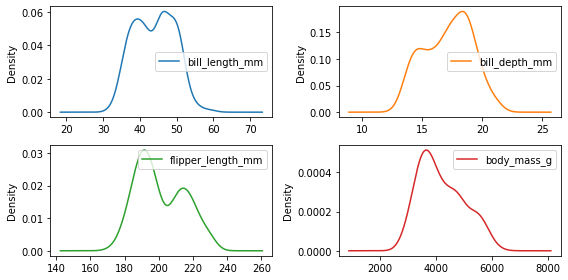

In [11]:
penguins_df.plot.kde(subplots=True, sharex=False, figsize=(8,4), layout=(2,2))
import matplotlib.pyplot as plt; plt.tight_layout() #axes look better with this :)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

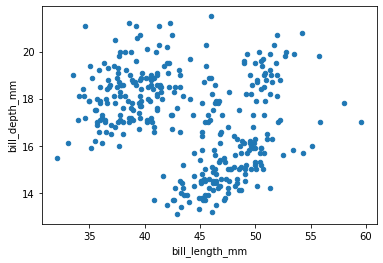

In [12]:
penguins_df.plot(y='bill_depth_mm', x='bill_length_mm', kind='scatter')